# Homework #1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn

# Google drive mount
from google.colab import drive
drive.mount('/content/drive')
# Read the file as list type
file = open('/content/drive/MyDrive/Colab Notebooks/regression_data.txt','r')
text = file.readlines()
file.close()

Mounted at /content/drive


In [8]:
print(text)

['0.07344104893026171 0.30577654340464877\n', '-0.6671361041630213 0.21484387904157468\n', '0.6110255704162972 0.35501391366259544\n', '-0.9845774527321076 0.20112862280820337\n', '-0.8837433910334389 0.2082755715198671\n', '-0.12854759010314276 0.3027415514693224\n', '0.22099135724553243 0.3316209902246986\n', '0.8534127709556332 0.38163625638979287\n', '0.6242369517172701 0.3556166815262491\n', '-0.9884481919394896 0.18689766580127848\n', '-0.19720628238168114 0.26657175813563644\n', '0.40892109591833226 0.3441350190637889\n', '0.30833442465401917 0.33391826602343727\n', '-0.7683662711499288 0.2484192484125181\n', '0.5810093587501926 0.36320411308762074\n', '-0.6130423180488918 0.22633849283964744\n', '0.37080779728646673 0.3126308632491387\n', '0.2689146356815888 0.33740516201145293\n', '0.06920308546332121 0.3047139374541547\n', '0.2582535575581715 0.3553355585400768\n', '0.646076592630676 0.3695065507898268\n', '0.06043786393526185 0.31084587768470995\n', '-0.15156313196207938 0.2

Raw/column separation

In [15]:
X = []
y = []

for i, s in enumerate(text) :
  if i % 10 == 0 :
    data = s.split()
    X.append(float(data[0]))
    y.append(float(data[1]))

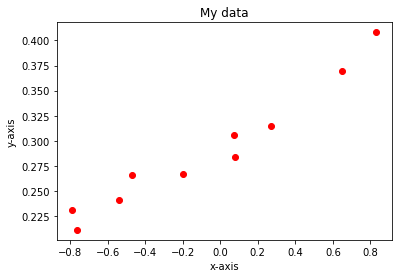

In [16]:
%matplotlib inline

plt.figure(1)
plt.plot(X, y, 'ro') # plot data

plt.xlabel('x-axis')  
plt.ylabel('y-axis')
plt.title('My data')

plt.show()

**Transform list to array**

In [17]:
X = np.asarray(X, dtype=np.float32)
y = np.asarray(y, dtype=np.float32)
print(X.shape, y.shape)

(10,) (10,)


**Expand the dimension of arrays : pytorch only accept +2 dimensional arrays**

In [18]:
if len(X.shape) == 1 and len(y.shape) == 1 :
  X = np.expand_dims(X, axis = -1)
  y = np.expand_dims(y, axis = -1)
print(X.shape, y.shape)

(10, 1) (10, 1)


**Define hyperparameters**

In [19]:
input_size = 1
output_size = 1
num_epochs = 100
learning_rate = 0.1
k = 5
n_k = int(len(X)/k)
val_loss = []

**Linear Regression with Pytorch, slicing**

In [20]:
for i in range(k) : 
  model = nn.Linear(input_size, output_size)
  criterion = nn.MSELoss()
  optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

  x_tr = np.concatenate((X[:i*n_k, :], X[(i+1)*n_k:, :]), axis = 0)
  y_tr = np.concatenate((y[:i*n_k, :], y[(i+1)*n_k:, :]), axis = 0)

  x_val = X[i*n_k:(i+1)*n_k, :]
  y_val = y[i*n_k:(i+1)*n_k, :]

  for epoch in range(num_epochs) :
    inputs = torch.from_numpy(x_tr)
    targets = torch.from_numpy(y_tr)

    outputs = model(inputs)
    loss = criterion(outputs, targets)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 20 == 0 :
      print('Epoch: {}/{}, Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
    
  input = torch.from_numpy(x_val)
  target = torch.from_numpy(y_val)
  output = model(input)
  loss = criterion(output, target)
  print('{}th round validation error : {}'.format(i+1, loss.item()))
  val_loss.append(loss.item())

val_loss = np.asarray(val_loss)
print('Final validation error: ', val_loss.mean())

Epoch: 20/100, Loss: 0.0007
Epoch: 40/100, Loss: 0.0002
Epoch: 60/100, Loss: 0.0002
Epoch: 80/100, Loss: 0.0002
Epoch: 100/100, Loss: 0.0002
1th round validation error : 8.72535165399313e-05
Epoch: 20/100, Loss: 0.0027
Epoch: 40/100, Loss: 0.0005
Epoch: 60/100, Loss: 0.0003
Epoch: 80/100, Loss: 0.0002
Epoch: 100/100, Loss: 0.0002
2th round validation error : 1.3595382597486605e-06
Epoch: 20/100, Loss: 0.0009
Epoch: 40/100, Loss: 0.0002
Epoch: 60/100, Loss: 0.0001
Epoch: 80/100, Loss: 0.0001
Epoch: 100/100, Loss: 0.0001
3th round validation error : 0.00042888912139460444
Epoch: 20/100, Loss: 0.0012
Epoch: 40/100, Loss: 0.0003
Epoch: 60/100, Loss: 0.0002
Epoch: 80/100, Loss: 0.0002
Epoch: 100/100, Loss: 0.0002
4th round validation error : 0.0003372037608642131
Epoch: 20/100, Loss: 0.0243
Epoch: 40/100, Loss: 0.0039
Epoch: 60/100, Loss: 0.0007
Epoch: 80/100, Loss: 0.0002
Epoch: 100/100, Loss: 0.0001
5th round validation error : 0.0009927263017743826
Final validation error:  0.000369486447